In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from matplotlib import rc #For Latex fonts
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

import numpy as np
import math

from scipy.stats import norm

#from mpl_toolkits import mplot3d
#import mayavi.mlab as mylab #For 3D visualization

# The force-shifted Lennard-Jones (fsLJ) potential

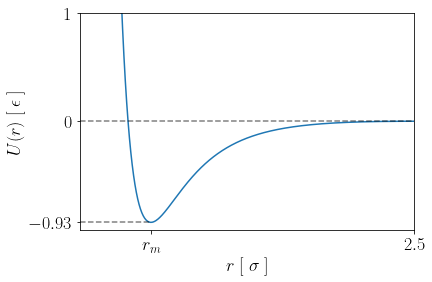

In [2]:

r = np.linspace(0.1,2.5,1000)

ep = 1.0
sgma = 1.0
rc = 2.5

def fsLJ(ep,sgma,rc,r):
    return 4*ep*((sgma/r)**12-(sgma/r)**6) - 4*ep*((sgma/rc)**12-(sgma/rc)**6) + (r-rc)*48*ep*((sgma/rc)**13-0.5*(sgma/rc)**7)

def LJ(ep,sgma,rc,r):
    return 4*ep*((sgma/r)**12-(sgma/r)**6)


def plot_fsLJ(ep,sgma,rc,r):
    res = np.zeros(len(r))
    for i in range(len(r)):
        res[i] = fsLJ(ep,sgma,rc,r[i])
    return res

def plot_LJ(ep,sgma,rc,r):
    res = np.zeros(len(r))
    for i in range(len(r)):
        res[i] = LJ(ep,sgma,rc,r[i])
    return res

x = plot_fsLJ(ep,sgma,rc,r)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(r,x)

min_fsLJ = np.amin(x)
minIndex = np.where(x == min_fsLJ)[0][0]
min_x = r[minIndex]

plt.yticks([min_fsLJ,0,1],["$-0.93$","$0$","$1$"],fontsize=18)
plt.xticks([min_x,2.5],["$r_m$","$2.5$"],fontsize=18)
#ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.1f'))
#ax.xaxis.set_major_formatter(tick.FormatStrFormatter('%.1f'))

plt.ylim(-1,1)
plt.xlim(0.75,2.5)
plt.ylabel(r"$U(r)\;[\;\epsilon\;]$",fontsize=18)
plt.xlabel(r"$r\;[\;\sigma\;]$",fontsize=18)

plt.axhline(0,0,1,color="black",alpha=.5,linestyle='--')
plt.axhline(np.amin(x),0,0.214,color="black",alpha=.5,linestyle='--')

#plt.savefig("fsLJ.png",bbox_inches="tight",dpi=200)

# Canonical MC (thermal equilibrium)

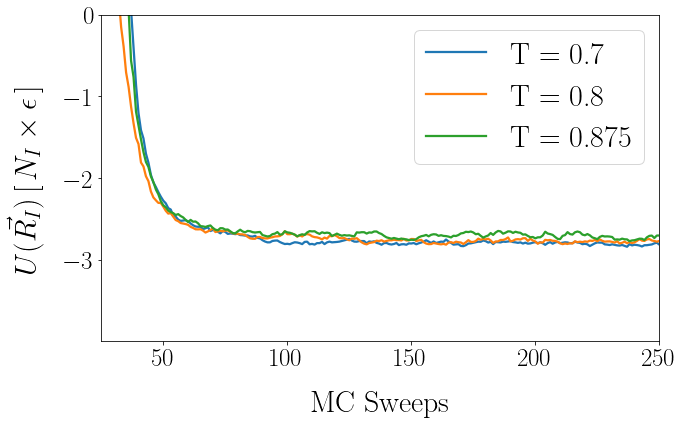

In [35]:
epotPath = 'path-to/dat/thermal_eq/epot_can_07.dat'
data = np.loadtxt(epotPath)

lineWidth = 2.25
titleSize = 40
legendSize = 30

x_labelSize = 30
y_labelSize = 30

x_tickSize = 25
y_tickSize = 25

fig = plt.figure(figsize=(10,6))

#plt.subplot(2,1,1)
plt.ylim(-4,0)
plt.xlim(25,250)
ticksY = np.arange(-3,1,1)
ticksX = np.arange(50,275,50)

#plt.title("Thermal Equilibrium",size=titleSize)

plt.xlabel(r"MC Sweeps",fontsize=x_labelSize,labelpad=20)
plt.ylabel(r"$U(\vec{R_I})\,[\,N_I\times\epsilon\,]$",fontsize=y_labelSize,position=(0,.5),labelpad=20)
plt.plot(data.T[0],data.T[1]/375,label="T = 0.7",ls="-",linewidth=lineWidth)

epotPath = 'path-to/dat/thermal_eq/epot_can_08.dat'
data = np.loadtxt(epotPath)
plt.plot(data.T[0],data.T[1]/375,label="T = 0.8",ls="-",linewidth=lineWidth)
epotPath = 'path-to/dat/thermal_eq/epot_can_0875.dat'
data = np.loadtxt(epotPath)
plt.plot(data.T[0],data.T[1]/375,label="T = 0.875",ls="-",linewidth=lineWidth)

plt.yticks(ticksY,fontsize=y_tickSize)
plt.xticks(ticksX,fontsize=x_tickSize)

plt.legend()
plt.legend(prop={'size': legendSize});

#plt.savefig("CanEq.png",bbox_inches="tight",dpi=200)

# Radial Distribution

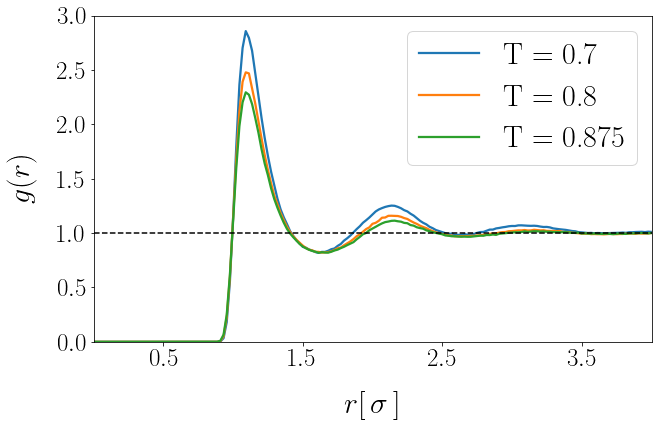

In [36]:
gr7_Path = 'path-to/dat/gr/gr_7.dat'
data7 = np.loadtxt(gr7_Path)

gr8_Path = 'path-to/dat/gr/gr_8.dat'
data8 = np.loadtxt(gr8_Path)

gr875_Path = 'path-to/dat/gr/gr_875.dat'
data875 = np.loadtxt(gr875_Path)

fig = plt.figure(figsize=(10,6))
plt.xlabel(r"$r[\,\sigma\,]$",fontsize=x_labelSize,labelpad=20)
plt.ylabel(r"$g(r)$",fontsize=y_labelSize,position=(0,.5),labelpad=20)

plt.plot(data7.T[0],data7.T[1],label="T = 0.7",linewidth=lineWidth)
plt.plot(data8.T[0],data8.T[1],label="T = 0.8",linewidth=lineWidth)
plt.plot(data875.T[0],data875.T[1],label="T = 0.875",linewidth=lineWidth)

plt.xlim(0,4)
plt.ylim(0,3)
ticksY = np.arange(0,3.5,.5)
ticksX = np.arange(0.5,4,1)
plt.yticks(ticksY,fontsize=y_tickSize)
plt.xticks(ticksX,fontsize=x_tickSize)

plt.legend(prop={'size': legendSize});
plt.axhline(1,0,1,color="black",alpha=1,linestyle="--")

#plt.savefig("gr.png",bbox_inches="tight",dpi=200)

# Gibbs MC simulation

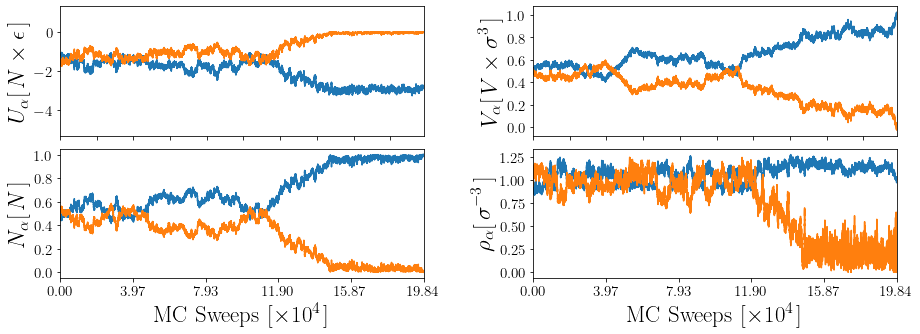

In [121]:
myPath = 'path-to/dat/100k Sweeps/T_875_200k_dV10/V_N.dat'
myPath_epot = 'path-to/dat/100k Sweeps/T_875_200k_dV10/epot.dat'


data = np.loadtxt(myPath)
epot = np.loadtxt(myPath_epot)

# data
# [0]:Steps, [1]:Va, [2]:Na, [3]:Vb, [4]:Nb

# epot
# [0]:Sweep, [1]:Ea, [2]:Eb

fig = plt.figure(figsize=(15,5))

x_labelSize = 23
y_labelSize = 23

x_tickSize = 15
y_tickSize = 15

# Scaled plot variables
eqPoint = 136000/10000

data.T[0] = data.T[0]/10000
epot.T[0] = epot.T[0]/10000

epot.T[1] = epot.T[1]/750
epot.T[2] = epot.T[2]/750

data.T[1] = data.T[1]/1500
data.T[3] = data.T[3]/1500

data.T[2] = data.T[2]/750
data.T[4] = data.T[4]/750


xlen = len(data.T[0])/10000


plt.subplot(2,2,1)
plt.xlim(0,xlen)
plt.xticks(np.arange(0,xlen,2),[])
plt.ylim(-4000/750,1000/750)
plt.ylabel(r"$U_\alpha[\,N\times\epsilon\,]$",fontsize=y_labelSize)
plt.plot(epot.T[0],epot.T[1])
plt.plot(epot.T[0],epot.T[2])
#plt.axvline(eqPoint,0,1,color="black",alpha=1,ls='--')
plt.yticks(fontsize=y_tickSize)
plt.xticks(fontsize=x_tickSize)

plt.subplot(2,2,2)
plt.xlim(0,xlen)
plt.xticks(np.arange(0,xlen,2),[])
plt.ylabel(r"$V_\alpha[\,V\times\sigma^3\,]$",fontsize=y_labelSize)
plt.plot(data.T[0],data.T[1])
plt.plot(data.T[0],data.T[3])
#plt.axvline(eqPoint,0,1,color="black",alpha=1,ls='--')
plt.yticks(fontsize=y_tickSize)
plt.xticks(fontsize=x_tickSize)


plt.subplot(2,2,3)
plt.xlim(0,xlen)
plt.ylabel(r"$N_\alpha[\,N\,]$",fontsize=y_labelSize)
plt.xlabel(r"MC Sweeps $[\times10^4\,]$",fontsize=x_labelSize)
plt.plot(data.T[0],data.T[2])
plt.plot(data.T[0],data.T[4])
#plt.axvline(eqPoint,0,1,color="black",alpha=1,ls='--')
plt.ticklabel_format(style="sci")
plt.yticks(fontsize=y_tickSize)
plt.xticks(np.arange(0,xlen+xlen/5,xlen/5),fontsize=x_tickSize)

plt.subplot(2,2,4)
plt.ylabel(r"$\rho_\alpha[\,\sigma^{-3}\,]$",fontsize=y_labelSize)
plt.xlabel(r"MC Sweeps $[\times10^4\,]$",fontsize=x_labelSize)
plt.plot(data.T[0],data.T[2]/data.T[1])
plt.plot(data.T[0],data.T[4]/data.T[3])
#plt.axvline(eqPoint,0,1,color="black",alpha=1,ls='--')
plt.yticks(fontsize=y_tickSize)
plt.xticks(np.arange(0,xlen+xlen/5,xlen/5),fontsize=x_tickSize)
plt.xlim(0,xlen)

# Subplot spacing
fig.subplots_adjust(hspace=0.1,wspace=0.3)

#plt.savefig("gibbs_9.png",bbox_inches="tight",dpi=200)

# Statistics at equilibrium

(0.0, 0.8)

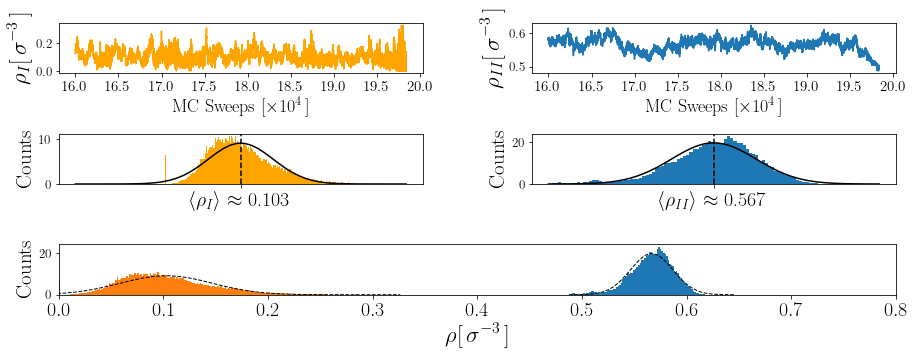

In [130]:
myPath = 'path-to/dat/100k Sweeps/T_875_200k_dV10/V_N.dat'
myPath_epot = 'path-to/dat/100k Sweeps/T_875_200k_dV10/epot.dat'


data = np.loadtxt(myPath)
epot = np.loadtxt(myPath_epot)

y_labelSize = 23
x_labelSize = 23
x_tickSize = 15
y_tickSize = 15

eqPoint = 160000
normal = 750/1500
normal=1

y_tickSize = 13

# empty arrays of sampling size > eqPoint
data_histoA = np.zeros(len(data.T[0])-eqPoint)
data_histoB = np.zeros(len(data.T[0])-eqPoint)

# fill arrays with densities
for i in range(len(data_histoA)):
    data_histoA[i] = data.T[2][i+eqPoint]/data.T[1][i+eqPoint]*normal
    data_histoB[i] = data.T[4][i+eqPoint]/data.T[3][i+eqPoint]*normal

# compute mean values & STD
av_rhoA = np.mean(data_histoA)
av_rhoB = np.mean(data_histoB)

sgma_A = np.std(data_histoA)
sgma_B = np.std(data_histoB)


delta_A = max( np.max(data_histoA) - av_rhoA, av_rhoA - np.min(data_histoA) )
delta_B = max( np.max(data_histoB) - av_rhoB, av_rhoB - np.min(data_histoB) )

domainA = np.linspace(av_rhoA-delta_A, av_rhoA+delta_A)
domainB = np.linspace(av_rhoB-delta_B, av_rhoB+delta_B)

temp = 0.7

# figure size
fig = plt.figure(figsize=(15,5))

# Subplot spacing
fig.subplots_adjust(hspace=1.2,wspace=0.3)

binWidth = .0015

# Number of Bins (Introduces some error in bin width -> bin width is almost the same for A and B)
binSizeA = math.ceil((data_histoA.max() - data_histoA.min())/binWidth)
binSizeB = math.ceil((data_histoB.max() - data_histoB.min())/binWidth)

binsA = np.zeros(binSizeA);
binsB = np.zeros(binSizeB);

# Define Bin Arrays for Histograms
for i in range(binSizeA):
    binsA[i] = i*binWidth + data_histoA.min()
    
for i in range(binSizeB):
    binsB[i] = i*binWidth + data_histoB.min()


x = np.arange(eqPoint,len(data.T[0]))
plt.subplot(3,2,2)
plt.ylabel(r"$\rho_{II}[\,\sigma^{-3}\,]$",fontsize=y_labelSize)
plt.xlabel(r"MC Sweeps $[\times10^4\,]$",fontsize=x_labelSize-5)
plt.plot(x/10000,data_histoA)
#plt.xlim(5,10)
plt.xticks(fontsize=x_tickSize)
plt.yticks(fontsize=y_tickSize)

plt.subplot(3,2,1)
plt.ylabel(r"$\rho_{I}[\,\sigma^{-3}\,]$",fontsize=y_labelSize)
plt.xlabel(r"MC Sweeps $[\times10^4\,]$",fontsize=x_labelSize-5)
plt.plot(x/10000,data_histoB,color="orange")
#plt.xlim(5,10)
plt.xticks(fontsize=x_tickSize)
plt.yticks(fontsize=y_tickSize)

plt.subplot(3,2,4)
plt.axvline(av_rhoA,0,1,color="black",alpha=1,ls="--")
plt.xticks([av_rhoA],[r"$\langle\rho_{II}\rangle \approx$ %.3f" % av_rhoA],fontsize = x_tickSize)
values, bins, _ = plt.hist(data_histoA,bins=binsA, align='mid',density="True")
#area_A = sum(np.diff(bins)*values)
#print(np.diff(bins)[0])
plt.xticks(fontsize=x_tickSize+5)
plt.yticks(fontsize=y_tickSize)
plt.ylabel("Counts",fontsize=y_labelSize-2)

plt.plot(domainA,norm.pdf(domainA,av_rhoA,sgma_A), linewidth=1.5, color="k")

plt.subplot(3,2,3)
plt.axvline(av_rhoB,0,1,color="black",alpha=1,ls="--")
plt.xticks([av_rhoB],[r"$\langle\rho_{I}\rangle \approx$ %.3f" % av_rhoB],fontsize = x_tickSize)
values, bins, _ = plt.hist(data_histoB,bins=binsB, align='mid',color="orange",density="True")
#area_B = sum(np.diff(bins)*values)
#print(np.diff(bins)[0])
plt.xticks(fontsize=x_tickSize+5)
plt.yticks(fontsize=y_tickSize)
plt.ylabel("Counts",fontsize=y_labelSize-2)

plt.plot(domainB,norm.pdf(domainB,av_rhoB,sgma_B), linewidth=1.5, color="k")

plt.subplot(3,1,3)
plt.hist(data_histoA,bins=binSizeA, align='mid',density="True")
plt.hist(data_histoB,bins=binSizeB, align='mid',density="True")
plt.plot(domainA,norm.pdf(domainA,av_rhoA,sgma_A), linewidth=1, color="black",ls="--")
plt.plot(domainB,norm.pdf(domainB,av_rhoB,sgma_B), linewidth=1, color="black",ls="--")
plt.xticks(fontsize=x_tickSize+5)
plt.yticks(fontsize=y_tickSize)
plt.xlabel(r"$\rho[\,\sigma^{-3}\,]$",fontsize=y_labelSize)
plt.ylabel("Counts",fontsize=y_labelSize-2)

plt.xlim(0,0.8)

#print("Sum_A =",area_A," ","Sum_B =",area_B," ","Diff =",area_A-area_B)

#plt.savefig("hist_7.png",format="png",bbox_inches="tight",dpi=200)

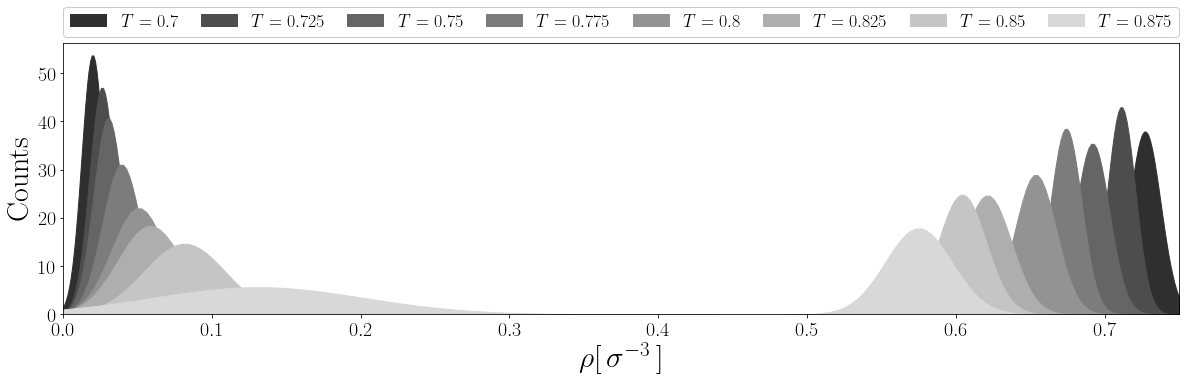

In [126]:
import matplotlib.pylab as pl

temp = ['700','725','750','775','800','825','850','875_200k_dV10']
labels=['$T=0.7$','$T=0.725$','$T=0.75$','$T=0.775$','$T=0.8$','$T=0.825$','$T=0.85$','$T=0.875$']
eqPoint = [50000,60000,30000,35000,30000,50000,35000,136000]
colors = pl.cm.Greys(np.linspace(0,1,60))

normal = 1

fig = plt.figure(figsize=(20,5))

for i in range(len(temp)):
    myPath = 'path-to/dat/100k Sweeps/T_' + temp[i] + '/V_N.dat'
    myPath_epot = 'path-to/dat/100k Sweeps/T_' + temp[i] + '/epot.dat'
    
    data = np.loadtxt(myPath)
    epot = np.loadtxt(myPath_epot)
    
    # empty arrays of sampling size > eqPoint
    data_histoA = np.zeros(len(data.T[0])-eqPoint[i])
    data_histoB = np.zeros(len(data.T[0])-eqPoint[i])

    # fill arrays with densities
    for j in range(len(data_histoA)):
        data_histoA[j] = data.T[2][j+eqPoint[i]]/data.T[1][j+eqPoint[i]]*normal
        data_histoB[j] = data.T[4][j+eqPoint[i]]/data.T[3][j+eqPoint[i]]*normal
    
    # compute mean values & STD
    av_rhoA = np.mean(data_histoA)
    av_rhoB = np.mean(data_histoB)

    sgma_A = np.std(data_histoA)
    sgma_B = np.std(data_histoB)


    delta_A = max( np.max(data_histoA) - av_rhoA, av_rhoA - np.min(data_histoA) )
    delta_B = max( np.max(data_histoB) - av_rhoB, av_rhoB - np.min(data_histoB) )

    domainA = np.linspace(av_rhoA-delta_A, av_rhoA+delta_A)
    domainB = np.linspace(av_rhoB-delta_B, av_rhoB+delta_B)
    
    # Plot
    if (av_rhoA < av_rhoB):
        plt.fill_between(domainA,norm.pdf(domainA,av_rhoA,sgma_A),alpha=1,color=colors[50-5*i],label=labels[i])
        plt.fill_between(domainB,norm.pdf(domainB,av_rhoB,sgma_B),alpha=1,color=colors[50-5*i])
        
    else:
        plt.fill_between(domainB,norm.pdf(domainB,av_rhoB,sgma_B),alpha=1,color=colors[50-5*i],label=labels[i])
        plt.fill_between(domainA,norm.pdf(domainA,av_rhoA,sgma_A),alpha=1,color=colors[50-5*i])

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(r"$\rho[\,\sigma^{-3}\,]$",fontsize=30)
    plt.ylabel("Counts",fontsize=30)
    
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
           mode="expand", borderaxespad=0, ncol=8,framealpha=1,fontsize=18)

plt.ylim(0)
plt.xlim(0,0.75)

#plt.savefig("std.png",bbox_inches="tight",dpi=200)

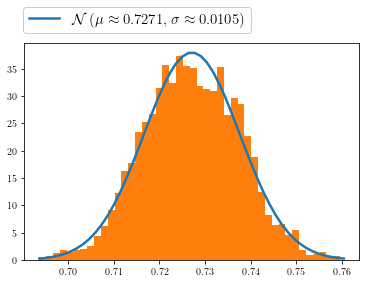

In [11]:
from scipy.stats import norm

data_histo = data_histoA
bins_ = binsA

mu = np.mean(data_histo)
sgma = np.std(data_histo)
domain = np.linspace(np.min(data_histo),np.max(data_histo))

label_N = "$\mathcal{N}\,($" + f'$\mu\\approx{"{:.4f}".format(mu)} , \sigma\\approx{"{:.4f}".format(sgma)})$'
plt.plot(domain,norm.pdf(domain,mu,sgma),label=label_N, linewidth=2.5)

plt.hist(data_histo,bins=bins_, align='mid',density="True")

plt.legend(fontsize=15,loc='upper right', bbox_to_anchor=(0.7, 1.2),framealpha=1)

# Pressure at equilibrium

0.0072503949618894295
0.01194790775698164


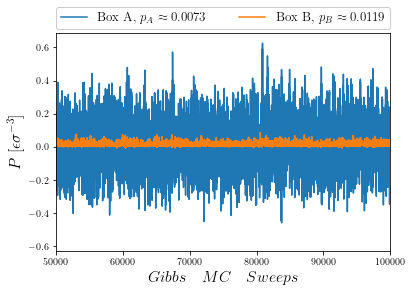

In [39]:
data_hist_P_A = np.zeros(len(epot.T[3])-eqPoint)
data_hist_P_B = np.zeros(len(epot.T[4])-eqPoint)

for i in range(len(data_hist_P_A)):
    data_hist_P_A[i] = epot.T[3][i+eqPoint]
    data_hist_P_B[i] = epot.T[4][i+eqPoint]
    
#plt.hist(data_hist_P_A,bins=50,label="Box A")
#plt.hist(data_hist_P_B,bins=50,label="Box B", alpha=0.75)

#plt.hist(epot.T[3],bins=50,label="Box A")
#plt.hist(epot.T[4],bins=50,label="Box B", alpha=0.75)

dataP = np.zeros(len(epot.T[0])-eqPoint)
pA = 0
pB = 0

for i in range(len(dataP)):
    pA += epot.T[3][i+eqPoint]
    pB += epot.T[4][i+eqPoint]
    
pA /= len(dataP)
pB /= len(dataP)

print(pA)
print(pB)

plt.ylabel(r"$P\;[\epsilon\sigma^{-3}]$",fontsize=y_labelSize)
plt.xlabel(r"$Gibbs\quad MC\quad Sweeps$",fontsize=x_labelSize)
plt.plot(epot.T[0],epot.T[3],label="Box A, " + f'$p_A\\approx{"{:.4f}".format(pA)}$')
plt.plot(epot.T[0],epot.T[4],label="Box B, " + f'$p_B\\approx{"{:.4f}".format(pB)}$')

#plt.axhline(pA,0,1,color="black",alpha=.6)
#plt.axhline(pB,0,1,color="red",alpha=.6)
plt.xlim(eqPoint,len(epot.T[0]))
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2,framealpha=1, fontsize=13)

#plt.savefig("Test_p_hist.png",bbox_inches="tight",dpi=200)

# System Binodal $(\;T - \rho\;)$

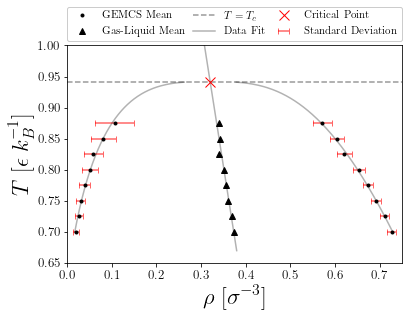

In [13]:

binodal_path = 'path-to/dat/binodal.txt'
b_data = np.loadtxt(binodal_path)

sgma_path = 'path-to/dat/sigma_binodal.dat'
sgma_data = np.loadtxt(sgma_path)

# MC Simulation
plt.plot(b_data.T[1], b_data.T[0], 'k.', label="GEMCS Mean")
plt.plot(b_data.T[2], b_data.T[0], 'k.')

# Average density fit function
x = np.arange(0.3,0.385,0.01) 
y = -4.57596 * x + 2.40867 
plt.plot(x,y,"k-",alpha=0.3)

# Average Points 
plt.plot((b_data.T[1]+b_data.T[2])/2, b_data.T[0], 'k^', label="Gas-Liquid Mean")

y_labelSize = 23
tickSize = 13
plt.ylabel("$T\;[\epsilon\;k_B^{-1}]$",fontsize=y_labelSize)
plt.xlabel(r"$\rho\;[\sigma^{-3}]$",fontsize=y_labelSize)
plt.xticks(fontsize=tickSize)
plt.yticks(fontsize=tickSize)
plt.xlim(0,0.75)
plt.ylim(0.65,1)

plt.errorbar(b_data.T[2],b_data.T[0],xerr=sgma_data.T[2],fmt="none",capsize=3,alpha=0.6,ecolor="r",label="Standard Deviation")
plt.errorbar(b_data.T[1],b_data.T[0],xerr=sgma_data.T[1],fmt="none",capsize=3,alpha=0.6,ecolor="r")

# Critical Temperature line
plt.axhline(0.94192,0,1,color="black",alpha=.4,ls="--", label="$T=T_c$")

# Binodal Fit
plt.plot(rho_g,T_i,"k",alpha=0.3,label="Data Fit")
plt.plot(rho_l,T_i,"k",alpha=0.3)

# Critical Intersection
plt.plot([0.320534],[0.94192],"rx",label="Critical Point",markersize=10)


plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=3,framealpha=1,fontsize=11)

#plt.savefig("binodal.png",bbox_inches="tight",dpi=200)

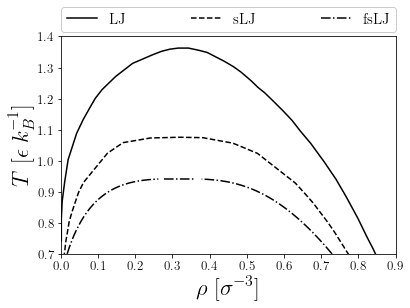

In [6]:
y_labelSize = 23
tickSize = 13

binodal_path = 'path-to/dat/binodal.txt'
b_data = np.loadtxt(binodal_path)

sgma_path = 'path-to/dat/sigma_binodal.dat'
sgma_data = np.loadtxt(sgma_path)

paper_theo = 'path-to/dat/paper_theo2.dat'
b_theo = np.loadtxt(paper_theo)

paper_exp = 'path-to/dat/shifted.dat'
b_exp = np.loadtxt(paper_exp)

# Paper Theory
plt.plot(b_theo.T[0], b_theo.T[1],'k', label="LJ")

# Paper Experimental
plt.plot(b_exp.T[0], b_exp.T[1],'k--', label="sLJ")

#y_labelSize = 18
plt.ylabel("$T\;[\epsilon\;k_B^{-1}]$",fontsize=y_labelSize)
plt.xlabel(r"$\rho\;[\sigma^{-3}]$",fontsize=y_labelSize)
plt.xlim(0,0.9)
plt.ylim(0.7,1.4)

plt.xticks(fontsize=tickSize)
plt.yticks(fontsize=tickSize)

# Binodal Fit
plt.plot(rho_g,T_i,"k-.",alpha=1,label="fsLJ")
plt.plot(rho_l,T_i,"k-.",alpha=1)
plt.axhline(0.94192,0.31,0.4,color="black",ls="-.")

plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",mode="expand", borderaxespad=0, ncol=3,framealpha=1,fontsize=15)

#plt.savefig("verlet.png",bbox_inches="tight",dpi=200)


# Critical point fit

<ipython-input-32-7944d0fbea8c>:12: RuntimeWarning: invalid value encountered in double_scalars
  rho_fit[i] = B*(1-(T[i]/Tc))**0.325


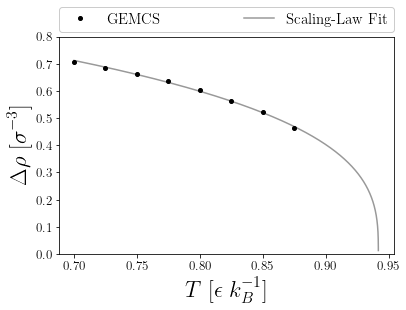

In [32]:

labelSize = 23
tickSize = 13

plt.plot(b_data.T[0], b_data.T[2]- b_data.T[1], 'k.',markersize=8,label="GEMCS")

T = np.arange(0.7,0.94192,0.000001)
rho_fit = np.zeros(len(T))

Tc = 0.94192
B = 1.10766
for i in range(len(T)):
    rho_fit[i] = B*(1-(T[i]/Tc))**0.325
    
plt.plot(T,rho_fit,"k-",alpha=0.4,label="Scaling-Law Fit")

plt.xlabel("$T\;[\epsilon\;k_B^{-1}]$",fontsize=labelSize)
plt.ylabel(r"$\Delta\rho\;[\sigma^{-3}]$",fontsize=labelSize)
plt.ylim(0,0.8)

plt.xticks(fontsize=tickSize)
plt.yticks(fontsize=tickSize)

plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",mode="expand", borderaxespad=0, ncol=3,framealpha=1,fontsize=15)

#plt.savefig("scalinglaw.png",bbox_inches="tight",dpi=200)

In [76]:

# Save point-data for delta_rho
# Fit with Mathematica
np.savetxt('delta_rho.dat', np.c_[b_data.T[2]- b_data.T[1],b_data.T[0]], fmt='%1.4e')


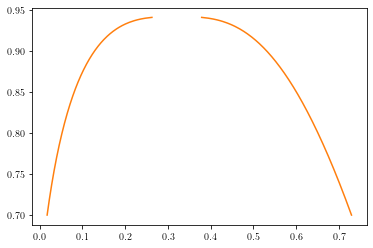

In [5]:
# Binodal Fit

Tc = 0.94192
B = 1.10766

T_i = np.arange(0.7,0.94192,0.001)

rho_i = (-T_i+2.40867)/4.57596
rho_g = rho_i - 0.5*B*(1-(T_i/Tc))**0.325
rho_l = 2*rho_i - rho_g

plt.plot(rho_g,T_i,"tab:orange")
plt.plot(rho_l,T_i,"tab:orange")

# System Binodal $(\;p - T;)$

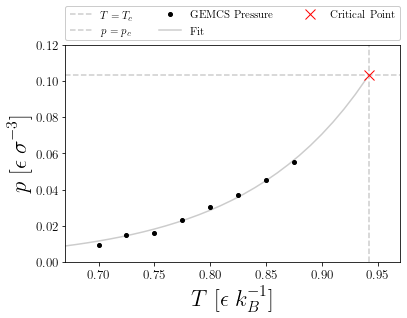

In [30]:
binodal_path = 'path-to/dat/binodal.txt'
b_data = np.loadtxt(binodal_path)

p_path = 'path-to/dat/pressure.dat'
p_data = np.loadtxt(p_path)


# Critical Temperature line
plt.axvline(0.94192,0,1,color="black",alpha=0.2,ls="--",label="$T=T_c$")
# Critical Pressureline
plt.axhline(0.102954,0,1,color="black",alpha=0.2,ls="--",label="$p=p_c$")


# Plot data points
plt.plot(b_data.T[0],(p_data.T[0]+p_data.T[1])/2,"k.",label="GEMCS Pressure",markersize=8)

# P(T) fit function Ansatz: a*Exp[b*x]
x_p = np.arange(0,0.95,0.01) 
y_p = 0.0000207641*np.exp(9.03348*x_p)
plt.plot(x_p,y_p,"k-",alpha=0.2,label="Fit")

plt.plot([0.94192],[0.102954],"rx",label="Critical Point",markersize=10)

plt.ylim(0,0.12)
plt.xlim(0.67,0.97)

plt.ylabel("$p\;[\epsilon\;\sigma^{-3}]$",fontsize=y_labelSize)
plt.xlabel("$T\;[\epsilon\;k_B^{-1}]$",fontsize=y_labelSize)

#tickSize=15
plt.xticks(fontsize=tickSize)
plt.yticks(fontsize=tickSize)



plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=3,framealpha=1,fontsize=11)

#plt.savefig("pressure.png",bbox_inches="tight",dpi=200)

In [77]:

# Save point-data for p vs T
# Fit with Mathematica
np.savetxt('p_T.dat', np.c_[ b_data.T[0],(p_data.T[0]+p_data.T[1])/2], fmt='%1.4e')
